In [ ]:
import numpy as np
import logging
import gensim
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 17.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4afbdb8f3ed3f2f852add8b7d0fef125e0d8d9fd7b862975ce09b8ce0aa47fb9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=48d1fb747f9e8f0a78d6b2b11ab9c3d97bcf8a93bf2612953f95e1206c0a6132
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import pyLDAvis.gensim

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID-19_title.csv to COVID-19_title.csv


In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import string
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import csv
from csv import reader
tit = []
with open("COVID-19_title.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [ ]:
print(len(tit))

242108


In [ ]:
print(tit[:1000])

[['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia'], ['nitric oxide pro-inflammatory mediator lung diseas'], ['surfactant protein-d pulmonary host defens'], ['role endothelin-1 lung diseas'], ['gene expression epithelial cells response pneumovirus infect'], ['sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi'], ['debate transfusing normal haemoglobin levels improve outcom'], ['21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001'], ['heme oxygenase-1 carbon monoxide pulmonary medicin'], ['technical description rods real-time public health surveillance system'], ['conservation polyamine regulation translational frameshifting yeast mamm'], ['heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus'], ['method identify domain interacting protein'], ['vaccinia virus infection disrupts microtubule organization centrosome f

In [ ]:
val = []
for i in tit:
  val.append(i[0])

In [ ]:
print(val[:100])

['clinical features culture-proven mycoplasma pneumoniae infections king abdulaziz university hospital jeddah saudi arabia', 'nitric oxide pro-inflammatory mediator lung diseas', 'surfactant protein-d pulmonary host defens', 'role endothelin-1 lung diseas', 'gene expression epithelial cells response pneumovirus infect', 'sequence requirements strand transfer nidovirus discontinuous subgenomic synthesi', 'debate transfusing normal haemoglobin levels improve outcom', '21st international symposium intensive care emergency medicine brussels belgium 20-23 march 2001', 'heme oxygenase-1 carbon monoxide pulmonary medicin', 'technical description rods real-time public health surveillance system', 'conservation polyamine regulation translational frameshifting yeast mamm', 'heterogeneous nuclear ribonucleoprotein regulates synthesis cytoplasmic virus', 'method identify domain interacting protein', 'vaccinia virus infection disrupts microtubule organization centrosome funct', 'site origin 1918 in

In [ ]:

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    texts.append(tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]



In [ ]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, passes=20)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3717246458697878


In [ ]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -4.255390566634602


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

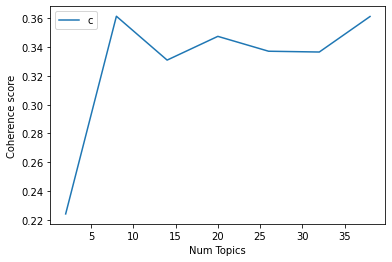

In [ ]:
compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

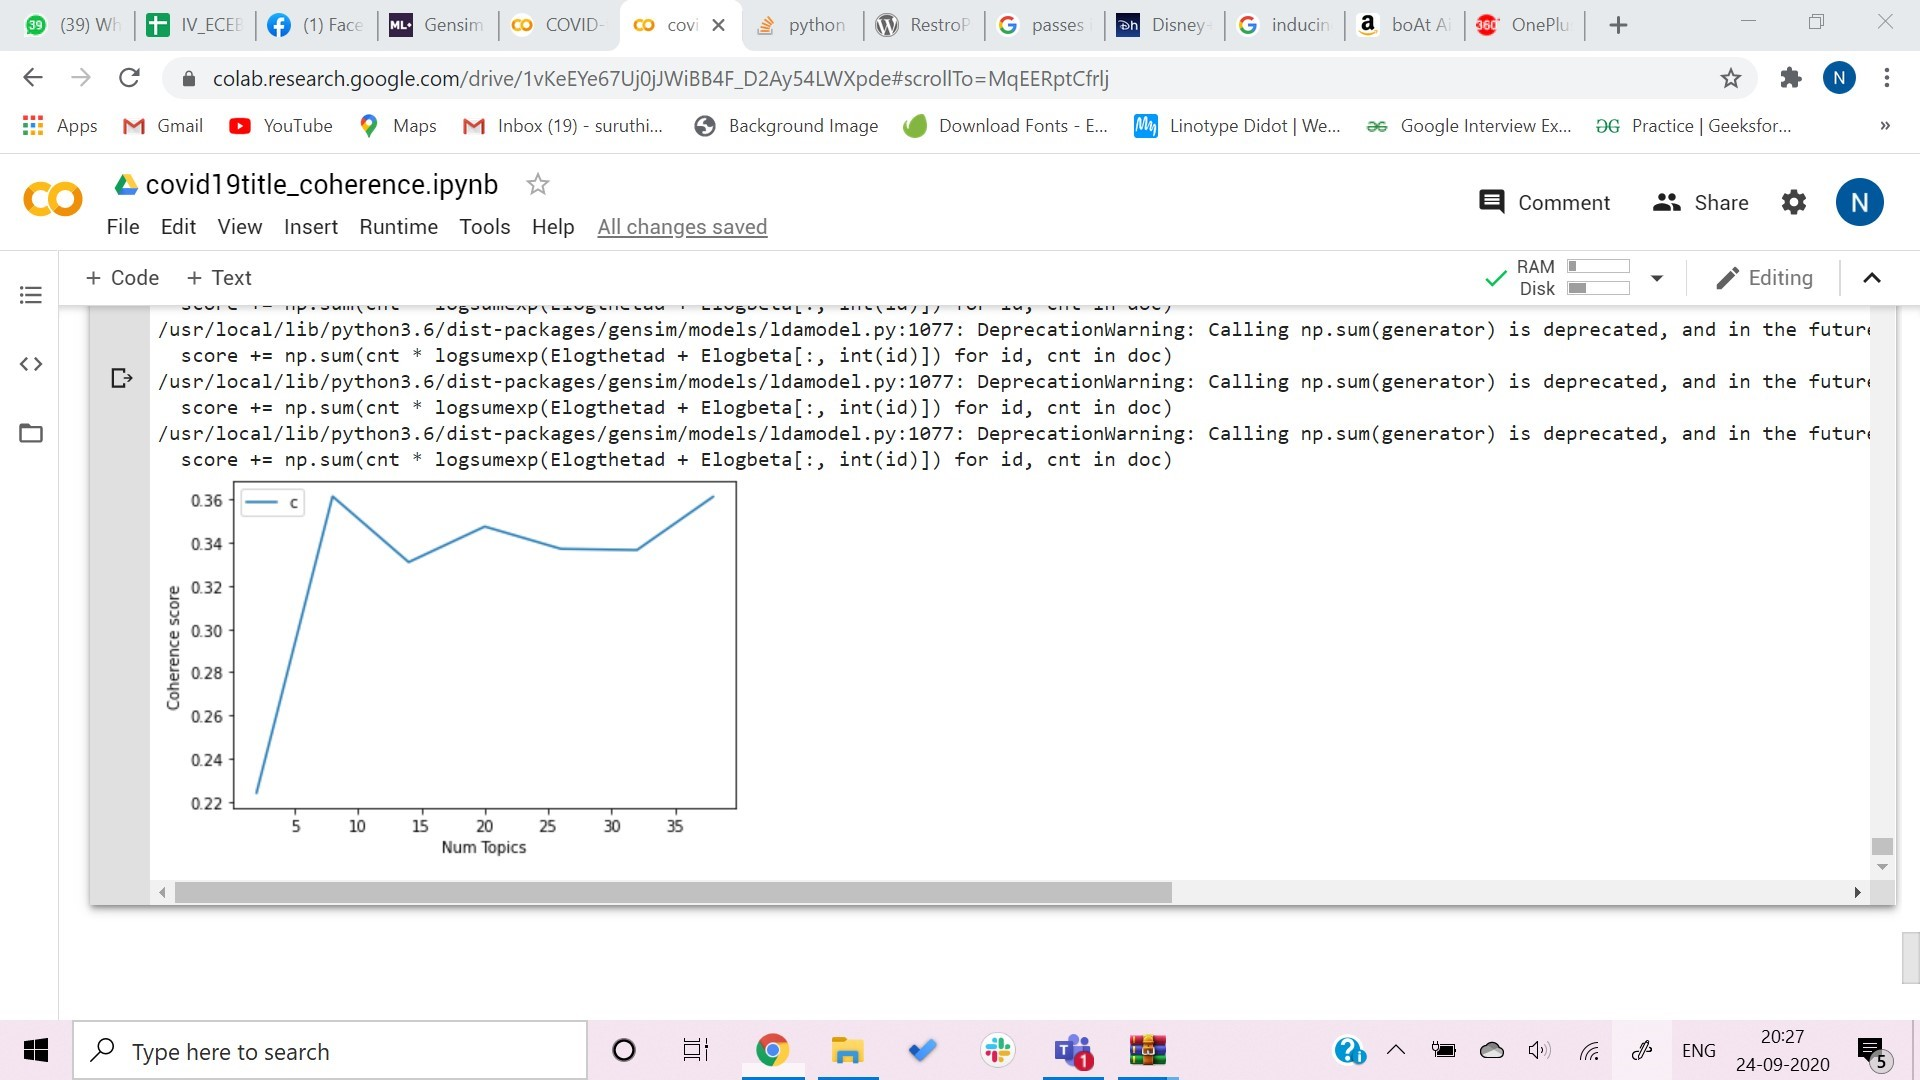

In [ ]:
#passes 1
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=11, id2word = dictionary, passes=1)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [ ]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3738666426099112


In [ ]:
top8 = ldamodel.print_topics(num_topics=11, num_words=7)

c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.058*"review" + 0.021*"systematic" + 0.020*"analysi" + 0.020*"chapter" + 0.019*"spike" + 0.014*"meta" + 0.011*"understanding"')
Topic 2
(1, '0.020*"surgery" + 0.013*"society" + 0.013*"psychological" + 0.012*"diabetes" + 0.010*"people" + 0.009*"crisi" + 0.008*"chronic"')
Topic 3
(2, '0.067*"virus" + 0.027*"human" + 0.022*"protein" + 0.016*"viral" + 0.012*"cell" + 0.012*"influenza" + 0.011*"infect"')
Topic 4
(3, '0.105*"sars" + 0.093*"cov" + 0.086*"2" + 0.012*"infection" + 0.011*"lessons" + 0.010*"porcine" + 0.010*"diarrhea"')
Topic 5
(4, '0.190*"covid" + 0.188*"19" + 0.053*"coronavirus" + 0.025*"pandemic" + 0.021*"pandem" + 0.020*"disease" + 0.019*"2019"')
Topic 6
(5, '0.024*"detection" + 0.021*"based" + 0.016*"rapid" + 0.015*"using" + 0.014*"time" + 0.013*"development" + 0.011*"mental"')
Topic 7
(6, '0.014*"drug" + 0.012*"potential" + 0.010*"therapeutic" + 0.010*"cardiovascular" + 0.010*"treatment" + 0.009*"angiotensin" + 0.009*"protective"')
Topic 8
(7, '0.017*"testing" 